In [6]:
#question 1

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images

# Build the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten the input
model.add(layers.Dense(128, activation='relu'))    # Hidden layer with ReLU activation
model.add(layers.Dense(10, activation='softmax'))   # Output layer for 10 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8827 - loss: 0.4226
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9639 - loss: 0.1220
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9766 - loss: 0.0769
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0549
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9876 - loss: 0.0413
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0898
Test accuracy: 0.9761999845504761


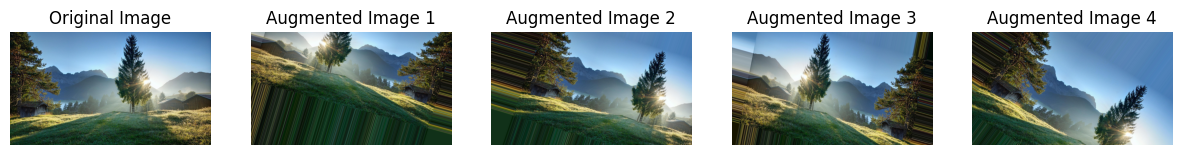

In [5]:
#question 2



import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Define the path to your image
image_path = "nature.jpeg"  # Replace with your image path

# Check if the file exists
if not os.path.isfile(image_path):
    raise FileNotFoundError(f"Image file not found at path: {image_path}")

# Create an instance of ImageDataGenerator with multiple augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=40,       # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,         # Randomly apply shearing transformations
    zoom_range=0.2,          # Randomly zoom into images by up to 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in pixels that are newly created during transformations
)

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path)
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)  # Convert image to a batch of size 1

# Apply augmentations
augmented_images = datagen.flow(image, batch_size=1)

# Plot the original and augmented images
plt.figure(figsize=(15, 15))

# Plot the original image
plt.subplot(1, 5, 1)
plt.imshow(image[0].astype('uint8'))
plt.title('Original Image')
plt.axis('off')

# Plot a few augmented images
for i in range(4):
    plt.subplot(1, 5, i + 2)
    batch = next(augmented_images)  # Use next() to get the next batch
    augmented_image = batch[0].astype('uint8')
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.losses import Loss
import numpy as np

# Define a custom loss function
class CustomLoss(Loss):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold

    def call(self, y_true, y_pred):
        # Compute the absolute error
        absolute_error = tf.abs(y_true - y_pred)
        # Apply custom penalty: increase loss if error exceeds threshold
        custom_loss = tf.where(absolute_error > self.threshold,
                               2 * absolute_error,
                               absolute_error)
        return tf.reduce_mean(custom_loss)

# Example usage of the custom loss function
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss=CustomLoss())

# Example data
X_train = np.random.rand(100, 10)
y_train = np.random.rand(100, 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5)

# Print the model summary
model.summary()

# Print the training history
print("Training history:")
print(history.history)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9038  
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8123 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7161 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5609 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4836 


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

Training history:
{'loss': [1.9234994649887085, 1.7907328605651855, 1.6918166875839233, 1.5272021293640137, 1.439048409461975]}


In [ ]:
# QUESTION 5

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Create ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

# Step 2: Load and Prepare the Pre-trained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the VGG16 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes for CIFAR-10

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 3: Freeze the Pre-trained Layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

# Step 5: Unfreeze and Fine-Tune the Model
for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(train_generator, epochs=5, validation_data=test_generator)

# Step 6: Evaluate the Model
eval_results = model.evaluate(test_generator)
print('Test Loss, Test Accuracy:', eval_results)

# Save the model
model.save('fine_tuned_vgg16_cifar10.h5')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 703/1563 ━━━━━━━━━━━━━━━━━━━━ 6:04 424ms/step - accuracy: 0.3779 - loss: 1.7519